## TC 5033
### Word Embeddings

<br>

#### Activity 3a: Exploring Word Embeddings with GloVe and Numpy
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project:
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    
   - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)
|



## Group 43

* Andrea M. Ruiz G. - A01794631
* Josías Ruiz P. - A00968460
* Saúl Y. Salgueiro L. - A0XXXXXXX
* Jesús Á. Salazar M. - A00513236

#### Import libraries

In [ ]:
# Import libraries
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle
plt.style.use('ggplot')

#### Load file

In [ ]:
# PATH = '/media/pepe/DataUbuntu/Databases/glove_embeddings/glove.6B.200d.txt'
# PATH = '/media/pepe/DataUbuntu/Databases/glove_embeddings/glove.6B.50d.txt'

PATH = './glove.6B.50d.txt'             # PATH to the glove_embeddings
emb_dim = 50                            # Specify the dimentions of the embedded words

In [ ]:
# Create dictionary with embeddings
def create_emb_dictionary(path : str, encoding = 'utf-8') -> dict:
  """Creates a dictionary<string, np.array> based on the given glove file

  Parameters
  ----------
  path: str, required
    Path to the glove.6B file

  encoding: str, optional (default utf-8)
    Specify the encoding to parse the file

  Returns
  -------
  dict
    embedded words by word
  """

  embeddingsByWord = {}                                                 # initializes dictionary where the key is the word and value is the embedded word
  with open(path, encoding = encoding) as lines:                        # reading txt file and saving its content as "lines"
    for line in lines:
      values = line.split()                                             # retrieving all values in the value
      word = values[0]                                                  # saving the first element
      embeddedWord = np.asarray(values[1:],dtype = 'float32')           # casting the rest of the elements as a numpy array
      embeddingsByWord[word] = embeddedWord                             # updating dictionary

  return embeddingsByWord

In [ ]:
# create dictionary
embeddings_dict = create_emb_dictionary(PATH)

In [ ]:
# Serialize
with open('embeddings_dict_50D.pkl', 'wb') as f:
  pickle.dump(embeddings_dict, f)                     # writes into disk a pickle file based on the embeddings_dict

the resulting pickle file can be found in the following link

https://drive.google.com/drive/folders/17dh2t3c0juNSGCND1AfxxysVJ0wn71lE?usp=sharing


In [ ]:
# uncomment the following lines of code to skip the creation of embeddings_dict based on the glove.6B.50d.txt file
# Deserialize
with open('embeddings_dict_50D.pkl', 'rb') as f:
  embeddings_dict = pickle.load(f)                  # recreates embeddings_dict based on previously saved pickle file

#### See some embeddings

In [ ]:
# Show some
def show_n_first_words(path, n_words):
        with open(path, 'r') as f:
            for i, line in enumerate(f):
                print(line.split(), len(line.split()[1:]))
                if i>=n_words: break

In [ ]:
# displays the first 5 lines in the glove.6B.50d.txt file
show_n_first_words(PATH, 5)

['the', '0.418', '0.24968', '-0.41242', '0.1217', '0.34527', '-0.044457', '-0.49688', '-0.17862', '-0.00066023', '-0.6566', '0.27843', '-0.14767', '-0.55677', '0.14658', '-0.0095095', '0.011658', '0.10204', '-0.12792', '-0.8443', '-0.12181', '-0.016801', '-0.33279', '-0.1552', '-0.23131', '-0.19181', '-1.8823', '-0.76746', '0.099051', '-0.42125', '-0.19526', '4.0071', '-0.18594', '-0.52287', '-0.31681', '0.00059213', '0.0074449', '0.17778', '-0.15897', '0.012041', '-0.054223', '-0.29871', '-0.15749', '-0.34758', '-0.045637', '-0.44251', '0.18785', '0.0027849', '-0.18411', '-0.11514', '-0.78581'] 50
[',', '0.013441', '0.23682', '-0.16899', '0.40951', '0.63812', '0.47709', '-0.42852', '-0.55641', '-0.364', '-0.23938', '0.13001', '-0.063734', '-0.39575', '-0.48162', '0.23291', '0.090201', '-0.13324', '0.078639', '-0.41634', '-0.15428', '0.10068', '0.48891', '0.31226', '-0.1252', '-0.037512', '-1.5179', '0.12612', '-0.02442', '-0.042961', '-0.28351', '3.5416', '-0.11956', '-0.014533', '-0.

### Plot some embeddings

In [ ]:
def plot_embeddings(emb_path, words2show, emb_dim, embeddings_dict, func = PCA):
  """Plots the embedded words using PCA/TSNE

  Parameters
  ----------
  words2show: list<str>, required
    words to plot

  embeddings_dict: dict<str, np.array>, required
    embedded words by word

  Returns
  -------
  np.array
    embedded words
  """
  array = []                                                                                # initializes array to temporarily store the embedded words to show
  for word in words2show:
    array.append(embeddings_dict[word])                                                     # adds the embedded word to the array

  embeddings = np.array(array)                                                              # converts array to np array (needed for TSNE)
  model = func(n_components = 2)                                                            # creates model (PCA / TSNE) and specifiy the number of components that input should be reduced to
  transformedData = model.fit_transform(embeddings)                                         # fits X into an embedded space

  plt.figure(figsize = (12,9))
  plt.scatter(transformedData[:,0], transformedData[:, 1], c = range(0, len(words2show)))
  for i in range(len(words2show)):
    plt.annotate(words2show[i], (transformedData[:,0][i], transformedData[:,1][i]+0.05))
  plt.show()

  return embeddings

In [ ]:
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips',
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']


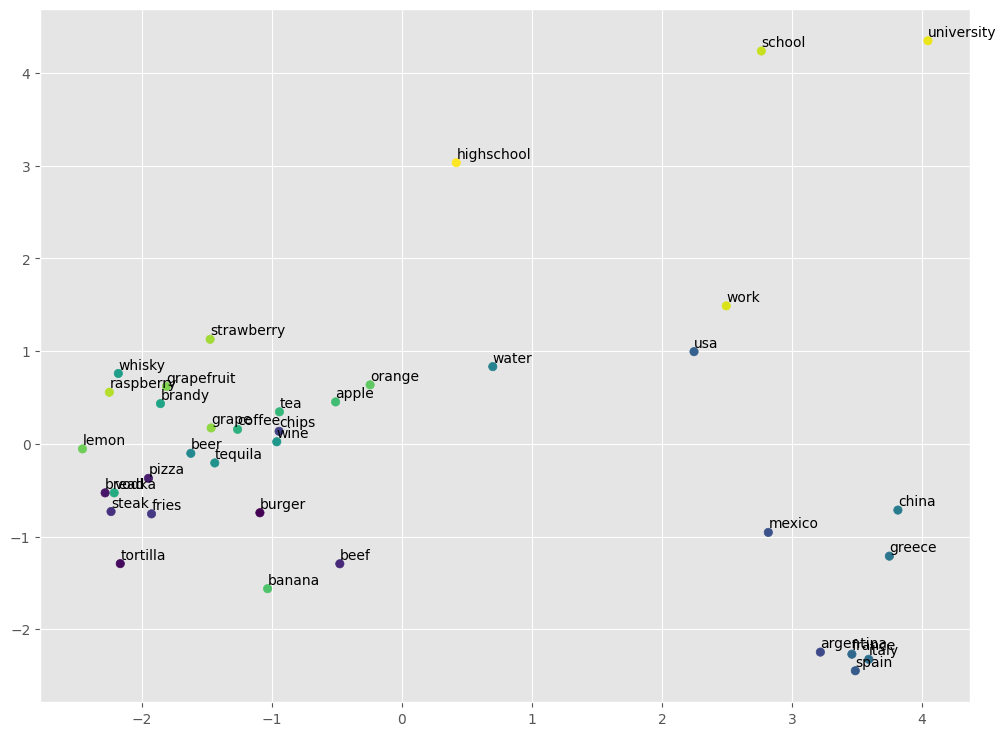

array([[ 0.36973 , -1.1797  , -0.92375 , ..., -0.54113 ,  0.21458 ,
         0.8122  ],
       [-0.80619 , -1.0245  , -0.28062 , ..., -0.47771 , -0.30275 ,
         0.012332],
       [-0.37436 , -0.11959 , -0.87609 , ..., -0.10138 , -0.51135 ,
        -0.18633 ],
       ...,
       [ 0.51359 ,  0.19695 , -0.51944 , ...,  0.046842, -0.62897 ,
         0.35726 ],
       [-1.1082  ,  1.2916  , -0.78751 , ...,  0.26268 , -0.54315 ,
         0.035944],
       [-0.94611 ,  0.64416 , -0.30484 , ...,  0.092469,  0.54045 ,
        -0.28299 ]], dtype=float32)

In [ ]:
#
plot_embeddings(PATH, words, emb_dim, embeddings_dict, PCA)

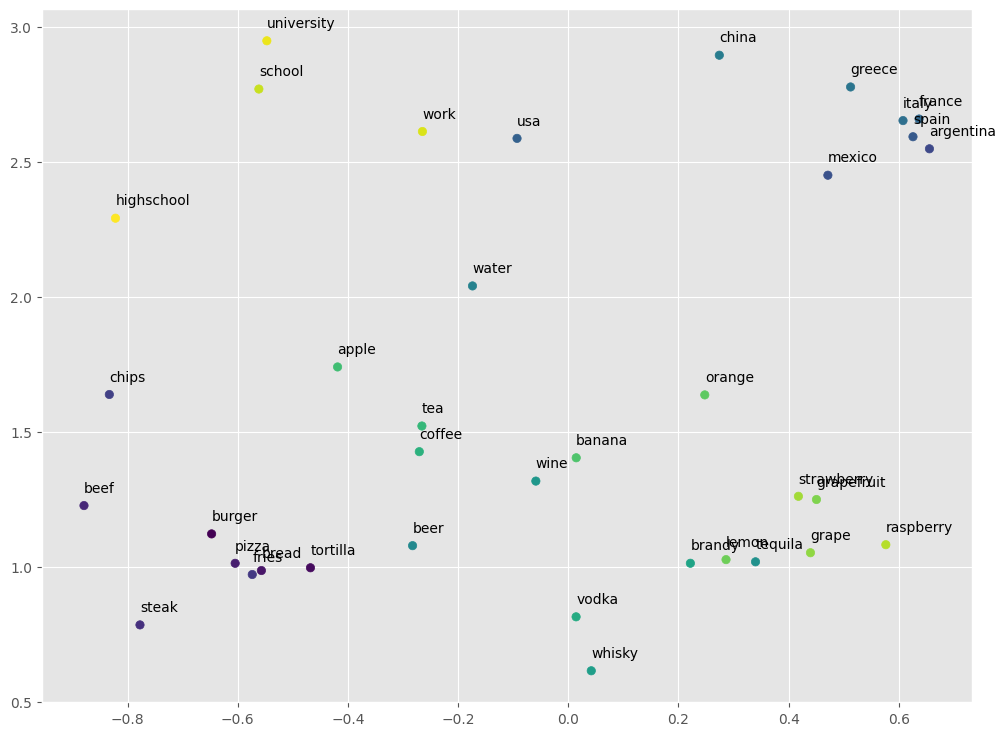

In [ ]:
# t-SNE dimensionality reduction for visualization
embeddings = plot_embeddings(PATH, words, emb_dim, embeddings_dict, TSNE)

### Let us compute analogies

In [ ]:
def cosineSimilarity(a : np.array, b : np.array) -> float:
  """Computes the cosine similarity between two arrays (https://en.wikipedia.org/wiki/Cosine_similarity)

  Parameters
  ----------
  a: np.array, required
    vector a

  a: np.array, required
    vector b

  Returns
  -------
  float
    cosine similarity
  """

  dotProduct = np.dot(a, b)                     # calculates the dot product of vectors a and b
  normA = norm(a)                               # calculates the L2 (Euclidean) norm of a
  normB = norm(b)                               # calculates the L2 (Euclidean) norm of b
  return dotProduct / (normA * normB)           # calculates the cosine similarity

In [ ]:
# computes the cosine similarity between good and execellent
cosineSimilarity(embeddings_dict['good'], embeddings_dict['excellent'])

0.8061553

In [ ]:
# most similar
def find_most_similar(word, embeddings_dict, top_n=10):
  """Computes the top n similar words in the embeddings_dict based on a given word

  Parameters
  ----------
  word: string, required
    target word

  embeddings_dict: dict<str, np.array>, required
    dictionary of embedded words

  top_n: integer, required
    specify how many similar words should be outputted

  Returns
  -------
  list
    top n similar words
  """


  # computes the similarity between the given word and all words available embeddings_dict
  similaritiesByWord = {
    w: cosineSimilarity(embeddings_dict[word], embeddings_dict[w])
      for w in embeddings_dict
      if w != word
  }

  # initialize array to store similar words
  similarWords = []

  for i in range(top_n):
    similar = max(similaritiesByWord, key=similaritiesByWord.get)       # computes the most similar word
    similarWords.append(similar)                                        # saves the most similar word
    similaritiesByWord.pop(similar)                                     # removes word in order to compute another similar word

  return similarWords

In [ ]:
most_similar = find_most_similar('mexico', embeddings_dict)

In [ ]:
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w}')

1 ---> mexican
2 ---> venezuela
3 ---> colombia
4 ---> peru
5 ---> chile
6 ---> puerto
7 ---> rico
8 ---> cuba
9 ---> guatemala
10 ---> panama


In [ ]:
# analogy
def analogy(word1, word2, word3, embeddings_dict):
  """Completes an analogy

  Parameters
  ----------
  words: string, required
  target word

  embeddings_dict: dict<str, np.array>, required
  dictionary of embedded words


  Returns
  -------
  string
  analogy
  """
  embedding1 = embeddings_dict[word1]
  embedding2 = embeddings_dict[word2]
  embedding3 = embeddings_dict[word3]

  # vector offset method
  analogy = embedding2 - embedding1 + embedding3

  #find the 'nearest' word comparing with other words using cosine similarity
  similar_word = ''
  max_cosine_sim = -1
  for word, vector in embeddings_dict.items():
    if word != word3 and word != word2:
      cosine_sim = cosineSimilarity(vector, analogy)
      if cosine_sim > max_cosine_sim:
        max_cosine_sim = cosine_sim
        similar_word = word
  print(f"{word1} is to {word2} as {word3} is to {similar_word}")


In [ ]:
analogy('man', 'king', 'woman', embeddings_dict)

man is to king as woman is to queen


In [50]:
analogy('mexico', 'tortilla', 'china', embeddings_dict)

mexico is to tortilla as china is to noodle
